In [25]:
import pandas as pd
import numpy as np

In [26]:
df= pd.read_csv('penguins_lter.csv')

In [27]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


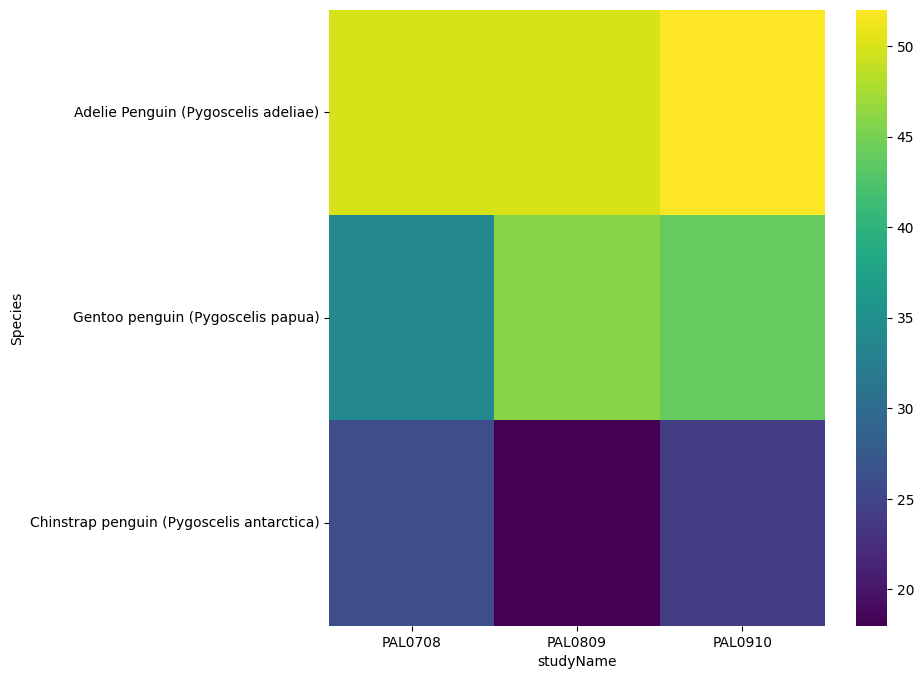

In [8]:
# @title studyName vs Species

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Species'].value_counts()
    for x_label, grp in df.groupby('studyName')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('studyName')
_ = plt.ylabel('Species')

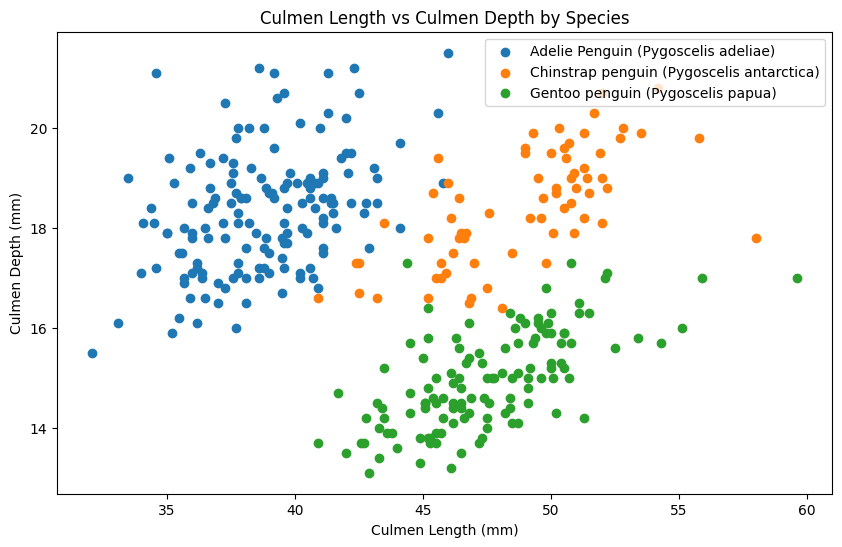

In [7]:
# @title Culmen Length vs Culmen Depth by Species

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'

plt.figure(figsize=(10, 6))
for species in df['Species'].unique():
    species_data = df[df['Species'] == species]
    plt.scatter(species_data['Culmen Length (mm)'], species_data['Culmen Depth (mm)'], label=species)
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Culmen Length vs Culmen Depth by Species')
_ = plt.legend()

In [28]:
df['Sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [29]:
import seaborn as sns
import pandas as pd # import pandas
import matplotlib.pyplot as plt
df_2dhist = df.groupby('studyName')['Species'].value_counts().rename('count').reset_index()
# Rename the columns to match your pivot_table call
# Now you can use pivot_table
df_2dhist

,studyName,Species,count
0,PAL0708,Adelie Penguin (Pygoscelis adeliae),50
1,PAL0708,Gentoo penguin (Pygoscelis papua),34
2,PAL0708,Chinstrap penguin (Pygoscelis antarctica),26
3,PAL0809,Adelie Penguin (Pygoscelis adeliae),50
4,PAL0809,Gentoo penguin (Pygoscelis papua),46
5,PAL0809,Chinstrap penguin (Pygoscelis antarctica),18
6,PAL0910,Adelie Penguin (Pygoscelis adeliae),52
7,PAL0910,Gentoo penguin (Pygoscelis papua),44
8,PAL0910,Chinstrap penguin (Pygoscelis antarctica),24


plt.subplots(figsize=(8, 8))
sd_2dhistpivot = df_2dhist.pivot_table(index='studyName', columns='Species', values='count')
sns.heatmap(sd_2dhistpivot, cmap='coolwarm',annot=True)
plt.xlabel('studyName')
plt.ylabel('Species')